In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df = pd.concat([df, df_test])
df.drop(['Descript', 'Resolution', 'Id'], axis= 1, inplace=True)

In [22]:
for c in df.columns:
    s = df[c].unique().size
    print 'column c = {}, size = {}'.format(c, s)

column c = Address, size = 24777
column c = Category, size = 40
column c = Dates, size = 781430
column c = DayOfWeek, size = 7
column c = PdDistrict, size = 10
column c = X, size = 37348
column c = Y, size = 37241


In [ ]:
import utm
def latlon_to_xy(r):
    lat = r['Y']
    lon = r['X']
    (x, y, _, _) = utm.from_latlon(lat, lon)
    return (x, y)
df['XY'] = df[['X', 'Y']].apply(latlon_to_xy, axis = 1)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Xs'] = scaler.fit_transform(df['X'] * 100).astype(np.float32)
df['Ys'] = scaler.fit_transform(df['Y'] * 100).astype(np.float32)

/usr/local/Cellar/python/2.7.10_2/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/Cellar/python/2.7.10_2/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/Cellar/python/2.7.10_2/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: 

In [55]:
pd_dict = {v: idx for (idx, v) in enumerate(df['PdDistrict'].unique())}
df['PDs'] = df['PdDistrict'].apply(lambda x: pd_dict[x]).astype(np.int8)
dw_dict = {v: idx for (idx, v) in enumerate(df['DayOfWeek'].unique())}
df['DWs'] = df['DayOfWeek'].apply(lambda x: dw_dict[x]).astype(np.int8)

In [56]:
cs = df['Category'].unique()
cs.sort()
cs = filter(lambda x: x is not np.nan, cs)
cat_dict = {v: idx for (idx, v) in enumerate(cs)}
df['Cs'] = df['Category'].apply(lambda x: cat_dict[x] if x is not np.nan else 100).astype(np.int8)

In [57]:
def year_f(s):
    return int(s[:4])
def month_f(s):
    return int(s[5:7])
def day_f(s):
    return int(s[8:10])
def hour_f(s):
    return int(s[11:13])
def minute_f(s):
    return int(s[14:16])
# df['dateobj'] = df['Dates'].apply(lambda x: pd.to_datetime(x))
df['year'] = df['Dates'].apply(year_f).astype(np.int16)
df['month'] = df['Dates'].apply(month_f).astype(np.int8)
df['day'] = df['Dates'].apply(day_f).astype(np.int8)
df['hour'] = df['Dates'].apply(hour_f).astype(np.int8)
df['minute'] = df['Dates'].apply(minute_f).astype(np.int8)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762311 entries, 0 to 884261
Data columns (total 17 columns):
Address       object
Category      object
Dates         object
DayOfWeek     object
PdDistrict    object
X             float64
Y             float64
Xs            float32
Ys            float32
PDs           int8
DWs           int8
Cs            int8
year          int16
month         int8
day           int8
hour          int8
minute        int8
dtypes: float32(2), float64(2), int16(1), int8(7), object(5)
memory usage: 136.1+ MB


In [59]:
addrs = df['Address']
addrs.name = 'Address'
addrs.reset_index(drop = True, inplace=True)
def addr_f(x):
    x = x.split(' of ')[-1]
    x = x.split(' / ')[-1]
    return x[-2:]
addrs2 = pd.Series(map(addr_f, addrs))
addrs2.name = 'A2'
z = pd.concat([addrs, addrs2], axis = 1)
addr_dict = {v:idx for (idx, v) in enumerate(z['A2'].unique())}
df['A2'] = df['Address'].apply(lambda x: addr_dict[addr_f(x)])

In [61]:
def addr_f1(x):
    x = x.split(' of ')[-1]
    x = x.split(' / ')[-1]
    return x
def addr_f2(x):
    x = x.split(' of ')[0]
    x = x.split(' / ')[0]
    return x
addrs_postx = addrs.apply(addr_f1)
addrs_prefx = addrs.apply(addr_f2)

In [63]:
from collections import Counter
d = Counter()
for p in addrs_prefx:
    d[p] += 1
d.most_common(100)

[('0 Block', 152966),
 ('100 Block', 104464),
 ('800 Block', 104409),
 ('200 Block', 77106),
 ('400 Block', 72966),
 ('300 Block', 72515),
 ('500 Block', 61121),
 ('600 Block', 46639),
 ('700 Block', 46490),
 ('1000 Block', 44615),
 ('900 Block', 36705),
 ('1200 Block', 30601),
 ('1100 Block', 29678),
 ('1300 Block', 26854),
 ('1400 Block', 26306),
 ('1500 Block', 25953),
 ('2000 Block', 25738),
 ('1600 Block', 23984),
 ('MISSION ST', 22357),
 ('1700 Block', 22130),
 ('1800 Block', 19122),
 ('MARKET ST', 16033),
 ('2300 Block', 15067),
 ('2100 Block', 14226),
 ('2200 Block', 13931),
 ('1900 Block', 12872),
 ('3RD ST', 12480),
 ('16TH ST', 12062),
 ('TURK ST', 10799),
 ('2400 Block', 10768),
 ('3200 Block', 10716),
 ('2500 Block', 9132),
 ('2600 Block', 8702),
 ('GEARY BL', 8203),
 ('3100 Block', 7767),
 ('6TH ST', 7759),
 ('EDDY ST', 7640),
 ('2800 Block', 7620),
 ('2700 Block', 7293),
 ('3000 Block', 7287),
 ('ELLIS ST', 7166),
 ('POLK ST', 7090),
 ('HAIGHT ST', 6998),
 ('3300 Block',

In [64]:
df

,Address,Category,Dates,DayOfWeek,PdDistrict,X,Y,Xs,Ys,PDs,DWs,Cs,year,month,day,hour,minute,A2
0,OAK ST / LAGUNA ST,WARRANTS,2015-05-13 23:53:00,Wednesday,NORTHERN,-122.425892,37.774599,0.043578,0.001276,0,0,37,2015,5,13,23,53,0
1,OAK ST / LAGUNA ST,OTHER OFFENSES,2015-05-13 23:53:00,Wednesday,NORTHERN,-122.425892,37.774599,0.043578,0.001276,0,0,21,2015,5,13,23,53,0
2,VANNESS AV / GREENWICH ST,OTHER OFFENSES,2015-05-13 23:33:00,Wednesday,NORTHERN,-122.424363,37.800414,0.044337,0.001770,0,0,21,2015,5,13,23,33,0
3,1500 Block of LOMBARD ST,LARCENY/THEFT,2015-05-13 23:30:00,Wednesday,NORTHERN,-122.426995,37.800873,0.043030,0.001778,0,0,16,2015,5,13,23,30,0
4,100 Block of BRODERICK ST,LARCENY/THEFT,2015-05-13 23:30:00,Wednesday,PARK,-122.438738,37.771541,0.037198,0.001217,1,0,16,2015,5,13,23,30,0
5,0 Block of TEDDY AV,LARCENY/THEFT,2015-05-13 23:30:00,Wednesday,INGLESIDE,-122.403252,37.713431,0.054821,0.000106,2,0,16,2015,5,13,23,30,1
6,AVALON AV / PERU AV,VEHICLE THEFT,2015-05-13 23:30:00,Wednesday,INGLESIDE,-122.423327,37.725138,0.044852,0.000330,2,0,36,2015,5,13,23,30,1
7,KIRKWOOD AV / DONAHUE ST,VEHICLE THEFT,2015-05-13 23:30:00,Wednesday,BAYVIEW,-122.371274,37.727564,0.070702,0.000376,3,0,36,2015,5,13,23,30,0
8,600 Block of 47TH AV,LARCENY/THEFT,2015-05-13 23:00:00,Wednesday,RICHMOND,-122.508194,37.776601,0.002706,0.001314,4,0,16,2015,5,13,23,0,1
9,JEFFERSON ST / LEAVENWORTH ST,LARCENY/THEFT,2015-05-13 23:00:00,Wednesday,CENTRAL,-122.419088,37.807802,0.046957,0.001911,5,0,16,2015,5,13,23,0,0


In [75]:
df2 = df.drop(['Address', 'Category', 'Dates', 'DayOfWeek', 'PdDistrict', 'X', 'Y'], axis = 1)

years = pd.get_dummies(df2['year'], prefix='y').astype(np.int8)
months = pd.get_dummies(df2['month'], prefix = 'm').astype(np.int8)
days = pd.get_dummies(df2['day'].apply(lambda x: int(x/7)), prefix = 'd').astype(np.int8)
addrs = pd.get_dummies(df['A2'], prefix = 'adr').astype(np.int8)
hours = pd.get_dummies(df2['hour'].apply(lambda x : int(x/4)), prefix ='h').astype(np.int8)
minutes = pd.get_dummies(df['minute'].apply(lambda x: int(x/10)), prefix = 'mn').astype(np.int8)
pds = pd.get_dummies(df['PDs'], prefix = 'pd').astype(np.int8)
dws = pd.get_dummies(df['DWs'], prefix = 'dw').astype(np.int8)

df3 = pd.concat([df2, years, months, days, hours, minutes, pds, dws, addrs], axis = 1)
df3 = df3.drop(['A2', 'year', 'month', 'day', 'hour', 'minute', 'PDs', 'DWs'], axis = 1)

In [76]:
df3.columns

Index([u'Xs', u'Ys', u'Cs', u'y_2003', u'y_2004', u'y_2005', u'y_2006',
       u'y_2007', u'y_2008', u'y_2009', u'y_2010', u'y_2011', u'y_2012',
       u'y_2013', u'y_2014', u'y_2015', u'm_1', u'm_2', u'm_3', u'm_4', u'm_5',
       u'm_6', u'm_7', u'm_8', u'm_9', u'm_10', u'm_11', u'm_12', u'd_0',
       u'd_1', u'd_2', u'd_3', u'd_4', u'h_0', u'h_1', u'h_2', u'h_3', u'h_4',
       u'h_5', u'mn_0', u'mn_1', u'mn_2', u'mn_3', u'mn_4', u'mn_5', u'pd_0',
       u'pd_1', u'pd_2', u'pd_3', u'pd_4', u'pd_5', u'pd_6', u'pd_7', u'pd_8',
       u'pd_9', u'dw_0', u'dw_1', u'dw_2', u'dw_3', u'dw_4', u'dw_5', u'dw_6',
       u'adr_0', u'adr_1', u'adr_2', u'adr_3', u'adr_4', u'adr_5', u'adr_6',
       u'adr_7', u'adr_8', u'adr_9', u'adr_10', u'adr_11', u'adr_12',
       u'adr_13', u'adr_14', u'adr_15', u'adr_16', u'adr_17', u'adr_18',
       u'adr_19', u'adr_20', u'adr_21', u'adr_22', u'adr_23', u'adr_24',
       u'adr_25'],
      dtype='object')

In [77]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762311 entries, 0 to 884261
Data columns (total 88 columns):
Xs        float32
Ys        float32
Cs        int8
y_2003    int8
y_2004    int8
y_2005    int8
y_2006    int8
y_2007    int8
y_2008    int8
y_2009    int8
y_2010    int8
y_2011    int8
y_2012    int8
y_2013    int8
y_2014    int8
y_2015    int8
m_1       int8
m_2       int8
m_3       int8
m_4       int8
m_5       int8
m_6       int8
m_7       int8
m_8       int8
m_9       int8
m_10      int8
m_11      int8
m_12      int8
d_0       int8
d_1       int8
d_2       int8
d_3       int8
d_4       int8
h_0       int8
h_1       int8
h_2       int8
h_3       int8
h_4       int8
h_5       int8
mn_0      int8
mn_1      int8
mn_2      int8
mn_3      int8
mn_4      int8
mn_5      int8
pd_0      int8
pd_1      int8
pd_2      int8
pd_3      int8
pd_4      int8
pd_5      int8
pd_6      int8
pd_7      int8
pd_8      int8
pd_9      int8
dw_0      int8
dw_1      int8
dw_2      int8
dw_3      in

In [78]:
df_input = df3

In [79]:
train, test = df_input[df_input['Cs'] != 100], df_input[df_input['Cs'] == 100]

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_predict, train_test_split
from sklearn.metrics import log_loss, accuracy_score
# import xgboost as xgb
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

/usr/local/Cellar/python/2.7.10_2/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [88]:
X, y = train.drop(['Cs'], axis = 1), train['Cs']
N = X.shape[0]
X_train, X_test, y_train, y_test = train_test_split(X[:N], y[:N], test_size = 0.33)

In [129]:
def vec_f(x):
    vec =np.zeros(len(cat_dict))
    if isinstance(x, list):
        for i in x: vec[i] = 1
    else:
        vec[x] = 1
    return vec

In [89]:
X_train.shape

(588292, 87)

In [90]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
w = np.sum(np.abs(clf.coef_), axis = 0)
indexes = w.argsort()
for i in indexes:
    print df3.columns[i], w[i]

adr_19 0.0550012925584
adr_24 0.107956769683
adr_17 0.142637441792
adr_16 0.143214862331
adr_20 0.155857514268
adr_23 0.194934753202
adr_21 0.263318897813
adr_18 0.467870670977
adr_14 0.823492286992
Ys 0.990900480384
adr_15 1.0940933941
adr_11 1.69067411152
adr_13 1.97400033957
m_8 2.83602624309
adr_9 2.92430947105
m_4 3.38729276993
adr_12 3.58912482539
m_1 3.59646690065
m_5 3.63977678868
Xs 3.72530975168
m_6 3.75018734851
adr_22 3.80280311817
m_2 3.94018953056
y_2015 3.993812749
m_10 4.06541115658
m_9 4.23775092922
adr_5 4.46460862731
m_7 4.5143191249
dw_4 4.8895391619
adr_10 5.24977947729
m_11 5.30675876909
m_3 5.3211878967
adr_4 5.38114002599
dw_5 5.62199183994
pd_9 5.6708537858
dw_0 5.82967824226
d_3 5.86703770474
adr_1 5.97628276507
y_2010 6.05835836174
y_2009 6.4378300062
dw_3 6.43971992796
adr_6 6.59039056933
y_2008 6.72808220824
dw_1 6.76039615712
y_2005 7.03817602269
d_1 7.06085581407
d_0 7.44611172203
mn_3 7.51126698048
adr_3 7.52735489121
adr_7 7.62269916942
mn_0 7.642391647

16 [  3.01874766e-03   9.87167265e-02   5.07967361e-05   1.99259666e-04
   2.98818679e-02   1.98829832e-03   4.51971462e-03   3.51658090e-02
   6.14813387e-03   5.02573592e-05   1.69766303e-04   9.92376033e-05
   1.24127454e-03   6.91983272e-03   1.93193844e-04   1.70219201e-03
   2.52107787e-01   1.71977031e-03   6.03763427e-04   8.15897082e-03
   9.61754455e-02   1.67480866e-01   1.16175611e-05   1.45682837e-02
   4.77201061e-04   4.47518670e-02   1.84112190e-04   1.25436509e-02
   3.53937748e-03   8.70328359e-05   1.15170927e-02   3.60838062e-04
   2.93872075e-02   9.64344529e-06   7.06754662e-03   4.92479187e-02
   2.66759856e-02   6.62583636e-02   1.70005491e-02] 37 0.0662583636495


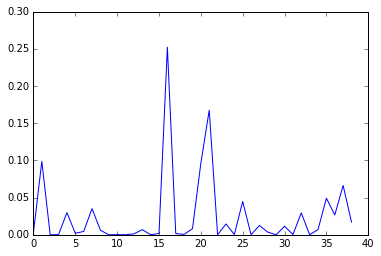

In [163]:
idx = 0
decision = clf.predict(X.iloc[idx: idx + 1])[0]
probas = clf.predict_proba(X.iloc[idx: idx + 1])[0]
print decision, probas, train['Cs'][idx], probas[37]
plt.plot(probas)
# clf.predict(X.iloc[idx:idx + 1])[0], plt.plot(clf.predict_proba(X.iloc[idx:idx + 1])[0]), train['Cs'][idx]

In [208]:
y_pred = clf.predict_proba(X_test)
# threshold, try possible values.
def prob_to_idx(probs):
    xs = []
    for (idx, v) in enumerate(probs):
        if v > 0.001:
            xs.append(idx)
    return xs
y_pred = map(lambda x: prob_to_idx(x), y_pred)
y_pred2 = np.array(map(vec_f, y_pred))
y_test2 = np.array(map(vec_f, y_test))
print log_loss(y_test2, y_pred2)
# print log_loss(y_pred, y_test)
#print accuracy_score(y_pred, y_test)

3.50103271666


In [209]:
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [210]:
X_output = test.drop(['Cs'], axis = 1)
y_output = clf.predict_proba(X_output)
y_output = map(lambda x: prob_to_idx(x), y_output)

In [211]:
y_output2 = np.array(map(vec_f, y_output))
df_output = pd.DataFrame(y_output2.astype(int), columns=cs)
df_output.to_csv('submission.csv', index=True, index_label='Id')
! gzip -f submission.csv